In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os

Prepare Data

In [75]:
test_dir = "./Processed_Split/Processed_Split/test/"
train_dir = "./Processed_Split/Processed_Split/train/"
val_dir = "./Processed_Split/Processed_Split/val/"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir, labels='inferred',image_size=(224, 224), shuffle=False)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir, labels='inferred',image_size=(224, 224), shuffle=False)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(val_dir, labels='inferred',image_size=(224, 224), shuffle=False)
class_names = train_ds.class_names

Found 45828 files belonging to 50 classes.
Found 9504 files belonging to 50 classes.
Found 9438 files belonging to 50 classes.


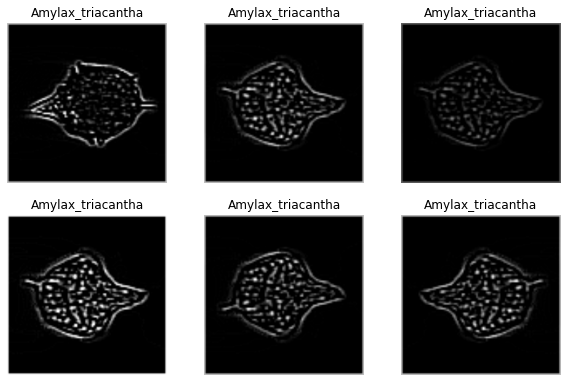

In [64]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [40]:
# train_ds = train_ds.map(lambda x, y: (x/255, y))
# test_ds = test_ds.map(lambda x, y: (x/255, y))
# val_ds = val_ds.map(lambda x, y: (x/255, y))


Creating ResNet Model

In [78]:
# resnet_model = Sequential()
input = keras.Input((224,224,3))
num_classes = 50
trained_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_tensor=input)
trained_model.trainable = False

# x = trained_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(trained_model.output)
outputs = keras.layers.Dense(num_classes, activation = 'softmax')(x)
model = keras.Model(trained_model.input,outputs)

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [79]:
history = model.fit(train_ds, validation_data=val_ds, epochs=1)


1433/1433 [==============================] - 4838s 3s/step - loss: 6.4845 - accuracy: 0.7502 - val_loss: 36.1889 - val_accuracy: 0.0403


Model Accuracy Graph

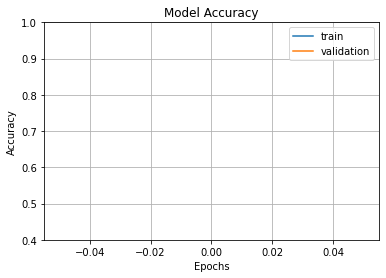

In [67]:
figures = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Model Loss Graph

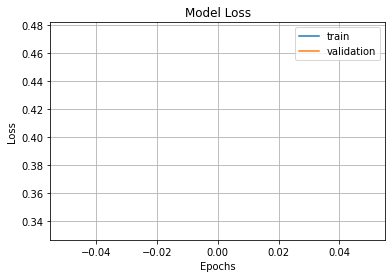

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Making Predictions with Model

In [81]:
# data_test = tf.keras.utils.image_dataset_from_directory(test_dir, labels='inferred', image_size=(224, 224), batch_size=32, shuffle=False)
# data_test = data_test.map(lambda x, y: (x, y))
prediction = model.predict(test_ds)
y_hat = np.argmax(prediction, axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

297/297 [==============================] - 697s 2s/step


In [83]:
print("Accuracy: ", accuracy_score(y_true, y_hat))
print("Precision: ", precision_score(y_true, y_hat, average='macro'))
print("Recall: ", recall_score(y_true, y_hat, average='macro'))
print("F1: ", f1_score(y_true, y_hat, average='macro'))
print(classification_report(y_true, y_hat, digits=4, target_names=sorted(os.listdir(test_dir))))

Accuracy:  0.04019360269360269
Precision:  0.0008038720538720538
Recall:  0.02
F1:  0.001545620068784139
                                    precision    recall  f1-score   support

                 Amylax_triacantha     0.0000    0.0000    0.0000         4
           Aphanizomenon_flosaquae     0.0000    0.0000    0.0000      1049
       Aphanothece_paralleliformis     0.0000    0.0000    0.0000         5
                             Beads     0.0000    0.0000    0.0000        20
                      Centrales_sp     0.0000    0.0000    0.0000        72
             Ceratoneis_closterium     0.0000    0.0000    0.0000         8
                    Chaetoceros_sp     0.0000    0.0000    0.0000       208
             Chaetoceros_sp_single     0.0000    0.0000    0.0000        33
                    Chlorococcales     0.0000    0.0000    0.0000        15
                     Chroococcales     0.0000    0.0000    0.0000        22
                 Chroococcus_small     0.0000    0.0000   

c:\Users\Nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,